In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch

In [2]:
sudoku1 = pd.read_csv("sudoku1.csv", delimiter="\t", header=None)
sudoku2 = pd.read_csv("sudoku2.csv", delimiter="\t", header=None)

# Select only EEG channels (columns 1 to 8?)
eeg_channels = list(range(1, 9)) # EEG channels from column index 1-8?
sudoku1_eeg = sudoku1.iloc[:, eeg_channels]
sudoku2_eeg = sudoku2.iloc[:, eeg_channels]

sudoku1_eeg = sudoku1_eeg.apply(pd.to_numeric)
sudoku2_eeg = sudoku2_eeg.apply(pd.to_numeric)
print(sudoku1_eeg.head())
print(sudoku2_eeg.head())

             1             2             3             4             5  \
0     0.000000      0.000000      0.000000      0.000000      0.000000   
1  8913.562764  17400.631893  23271.362277  20163.173397  24611.349358   
2  8040.235405  16512.999417  22380.265281  19266.846093  23718.508925   
3  6743.811875  15223.259058  21090.748440  17974.468228  22431.271962   
4  7412.531365  15905.166078  21768.945070  18651.234347  23118.118717   

              6             7             8  
0      0.000000      0.000000      0.000000  
1  11486.784993  19364.746733  14552.572614  
2  10587.261389  18475.370821  13660.022755  
3   9301.432586  17191.084288  12371.064707  
4   9999.812841  17878.579244  13050.982422  
              1             2             3             4             5  \
0      0.000000      0.000000      0.000000      0.000000      0.000000   
1  42721.783247  52654.205579  55896.057891  53493.692397  57934.358172   
2  41551.356501  51484.672902  54724.535909  52322.729

In [3]:
# Extract timestamp column (second-to-last column)
sudoku1_timestamps = sudoku1.iloc[:, -2]
sudoku2_timestamps = sudoku2.iloc[:, -2]

# Normalize timestamps (not sure of this is the right way to convert time)
sudoku1_time_fixed = sudoku1_timestamps - sudoku1_timestamps.iloc[0]
sudoku2_time_fixed = sudoku2_timestamps - sudoku2_timestamps.iloc[0]

# Convert to seconds if necessary
if sudoku1_time_fixed.max() > 1e6:
    sudoku1_time_fixed = sudoku1_time_fixed / 1e9
    sudoku2_time_fixed = sudoku2_time_fixed / 1e9

# Trim Data to 300 Seconds
sudoku1_trimmed = sudoku1[sudoku1_time_fixed <= 300]
sudoku1_time_trimmed = sudoku1_time_fixed[sudoku1_time_fixed <= 300]
sudoku2_trimmed = sudoku2[sudoku2_time_fixed <= 300]
sudoku2_time_trimmed = sudoku2_time_fixed[sudoku2_time_fixed <= 300]

In [ ]:
# Bandpass filter function
def bandpass_filter(data, lowcut=0.1, highcut=30, fs=250, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=0)

sudoku1_filtered = bandpass_filter(sudoku1_trimmed.iloc[:, eeg_channels], lowcut=0.1, highcut=30, fs=250)
sudoku2_filtered = bandpass_filter(sudoku2_trimmed.iloc[:, eeg_channels], lowcut=0.1, highcut=30, fs=250)

array([[ 1404.48174038,  1399.03182916,  1402.97125677, ...,
         1403.86045367,  1400.65583768,  1400.54581572],
       [20788.87791915, 25357.36523372, 26852.85630202, ...,
        21786.93216218, 25601.53359455, 22804.84791327],
       [36294.27500801, 44519.24715864, 47206.99359224, ...,
        38090.51846301, 44957.16235183, 39925.06953988],
       ...,
       [ 4413.00768838,  4416.37774807,  4407.4881216 , ...,
         4408.82706979,  4420.42375671,  4410.42580744],
       [ 4103.70046012,  4106.42196654,  4096.60775449, ...,
         4100.23301801,  4108.86839323,  4099.44559143],
       [ 3736.8809114 ,  3738.78613514,  3728.09255998, ...,
         3734.03607541,  3739.56038941,  3730.81540427]], shape=(75032, 8))

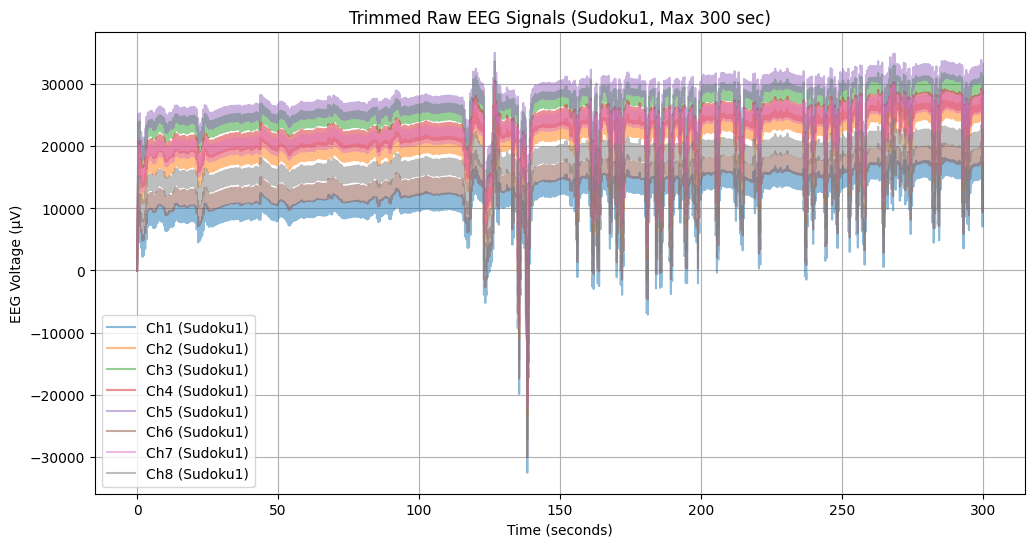

In [5]:
# Raw EEG signals for sudoku1
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.plot(sudoku1_time_trimmed, sudoku1_trimmed.iloc[:, i+1], label=f"Ch{i+1} (Sudoku1)", alpha=0.5)
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Voltage (µV)")
plt.title("Trimmed Raw EEG Signals (Sudoku1, Max 300 sec)")
plt.legend()
plt.grid()
plt.show()


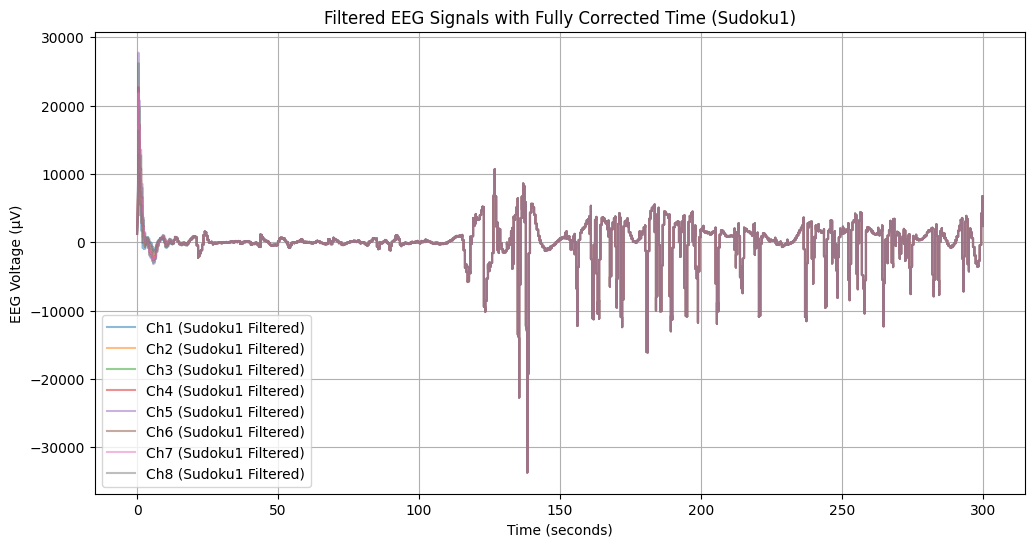

In [ ]:
# Filtered EEG signals for sudoku1
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.plot(sudoku1_time_trimmed, sudoku1_filtered[:, i], label=f"Ch{i+1} (Sudoku1 Filtered)", alpha=0.5)
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Voltage (µV)")
plt.title("Filtered EEG Signals with Fully Corrected Time (Sudoku1)")
plt.legend()
plt.grid()
plt.show()

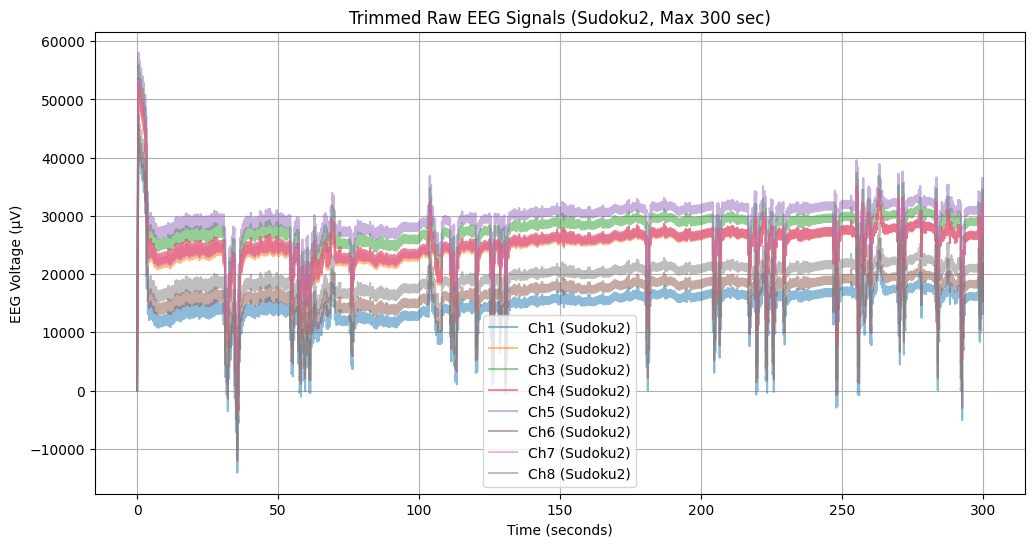

In [7]:
# Raw EEG Signals for Sudoku2
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.plot(sudoku2_time_trimmed, sudoku2_trimmed.iloc[:, i+1], label=f"Ch{i+1} (Sudoku2)", alpha=0.5)
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Voltage (µV)")
plt.title("Trimmed Raw EEG Signals (Sudoku2, Max 300 sec)")
plt.legend()
plt.grid()
plt.show()

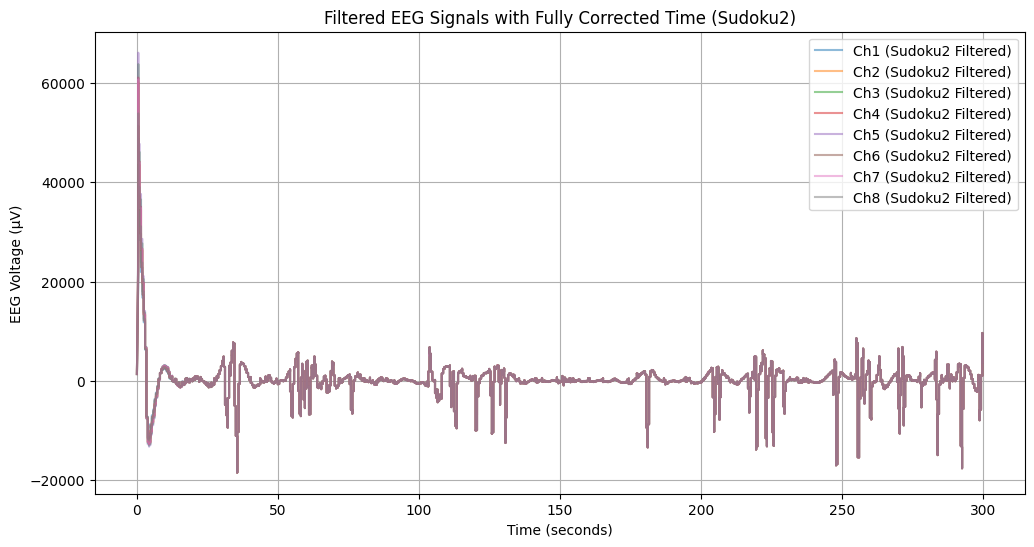

In [ ]:
# Filtered EEG Signals for Sudoku2
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.plot(sudoku2_time_trimmed, sudoku2_filtered[:, i], label=f"Ch{i+1} (Sudoku2 Filtered)", alpha=0.5)
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Voltage (µV)")
plt.title("Filtered EEG Signals with Fully Corrected Time (Sudoku2)")
plt.legend()
plt.grid()
plt.show()

In [9]:
# Compute and Plot EEG Power Changes Between Sudoku1 and Sudoku2
bands = {"Delta": (0.5, 4), "Theta": (4, 8), "Alpha": (8, 12), "Beta": (12, 30)}
psd_values = {}
for band, (low, high) in bands.items():
    psd_values[band] = {}
    for i in range(8):
        freqs, psd1 = welch(sudoku1_filtered[:, i], fs=250, nperseg=250*2)
        freqs, psd2 = welch(sudoku2_filtered[:, i], fs=250, nperseg=250*2)
        band_idx = np.where((freqs >= low) & (freqs <= high))
        psd_values[band][f"Ch{i+1}"] = np.mean(psd2[band_idx]) - np.mean(psd1[band_idx])

psd_df = pd.DataFrame(psd_values)

<Figure size 800x500 with 0 Axes>

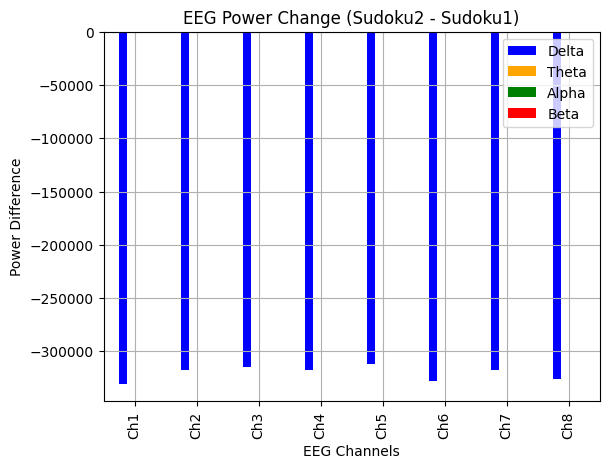

In [10]:
# EEG Power Differences Between Sudoku1 and Sudoku2
plt.figure(figsize=(8, 5))
psd_df.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.xlabel("EEG Channels")
plt.ylabel("Power Difference")
plt.title("EEG Power Change (Sudoku2 - Sudoku1)")
plt.legend(["Delta", "Theta", "Alpha", "Beta"])
plt.grid()
plt.show()